## Microsoft Movie Project


**Author:** [Wallace Ouma](https://medium.com/@kkalawi10)
***
## 1. Business Understanding
**a. Overview**

This study sought to guide Microsoft's possible foray into original video content by studying current patterns in box office success. By using descriptive statistics and analyzing several online movie databases, we have identified three key areas that provide unique opportunities for recommendations: establishing strategic partnerships, improving content selection, and optimizing talent acquisition and recruiting.

**b. Business Problem**

Microsoft's new film studio, lacking competence in filmmaking, needs guidance about the most advantageous film genres for achieving maximum box office success. This investigation seeks to affect the studio's film choices by analyzing past box office statistics and examining genre patterns. Key metrics such as box office sales, return on investment (ROI), and ratings will assess the financial feasibility and audience response across various film genres.


**c. Areas of Focus**

This notebook is dedicated to exploring three key aspects of the movie industry, each with its own dedicated section. The focus areas include:

1. **Cast & Crew:** Prioritizing specific professions within the industry.
2. **Advertising:** Identifying priority areas for investment.
3. **Genre:** Analyzing genres to determine which ones are riskier and which ones are safer bets.

* Measures of Success

To assess a movie's success, two custom metrics are employed, providing a unique perspective:

1. **ROI (Return on Investment):**
   - Calculated as the overall gross of a movie divided by its budget.
   - Break-even point at ROI = 100%, indicating the movie recouped its costs.
   - A movie is deemed profitable if ROI > 100%, and unprofitable if ROI < 100%.
   - Example: An ROI of 450% implies the movie generated 4.5 times its initial investment.

2. **Profitable (Boolean Variable):**
   - Equates to True (1) if ROI > 100%.
   - Equates to False (0) if ROI <= 100%.

These metrics extend beyond evaluating movies and can be applied to assess an individual's success in the movie industry.

**d. Additional Metrics for Individual Evaluation**

1. **Average ROI:**
   - Represents the average ROI of all movies an individual has participated in.
   - Example: An average ROI of 258% indicates that, on average, the movies they are involved in have earned 2.58 times their budget.

2. **Hitrate:**
   - Denotes the average value of the Profitable boolean across all movies an individual has participated in.
   - Example: A hitrate of 67% implies that 67% of the movies they're involved in have been profitable.

**e. Methods**

To unravel the secrets of box office success, we employ descriptive statistics. This allows us to delve into the performance metrics of top studios, genres, directors, and writers. The goal is to extract actionable insights that can guide Microsoft Studios in its venture into the world of filmmaking.

## 2. Data Understanding

The data used in the project was obtained from [IMDB](https://www.imdb.com/), [The Numbers](https://www.the-numbers.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), and [Minneapolis Fed](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1800-). The data was joined using movie names as well as with the help of unique ids for movies and crew.

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sqlite3 
import requests
import zipfile
import os

%matplotlib inline 

In [2]:
# Reading the CSV Files USED
budgets_df = pd.read_csv("Dataset/tn.movie_budgets.csv") #USED

#Reading datasets NOT USED

bom = pd.read_csv ("Dataset/bom.movie_gross.csv") #
tmdb_movies = pd.read_csv ("Dataset/tmdb.movies.CSV", index_col= 0) #Reading the Movies Database
#Reading Rotten Tomatoes
rt_reviews = pd.read_csv("Dataset/rt.reviews.tsv", sep = "\t", encoding= 'unicode_escape')
rt_movie = pd.read_csv("Dataset/rt.movie_info.tsv", sep ="\t")
#Establishing Connection to the Database
conn = sqlite3.connect ("Dataset/im.db")


Extracting `im.db` zipped file

In [3]:
zip_file_path = 'Dataset/im.zip'
extracted_folder = 'data'

# Check if the file is already extracted
extracted_file_path = os.path.join(extracted_folder, 'im.db')
if os.path.isfile(extracted_file_path):
    print("File already extracted.")
else:
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extract('im.db', extracted_folder)

    print("File successfully extracted.")

File already extracted.


Loading and Reading the Database tables

In [4]:
conn = sqlite3.connect("data/im.db")

# Retreiving relevant tables from the imdb database
movie_basics = pd.read_sql(""" SELECT * FROM movie_basics """, conn)
persons = pd.read_sql(""" SELECT * FROM persons """, conn)
principals = pd.read_sql(""" SELECT * FROM principals """, conn)

**Checking the Movies Budget Dataset**

In [5]:
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**`budgets_df` – Data Selection**

In this analysis, the primary focus is leveraging the extensive budget data available in the thenumbers dataset, surpassing others in data points. This dataset was the only one to be analyzed to maximize the amount of data for a thorough analysis of the film business. By focusing on the numbers dataset, we expect to get a more comprehensive and nuanced knowledge of many sector aspects, which aligns with our objective of delivering a complete and wise study.

In [6]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#Renaming some columns to simpler names
budgets_df.rename(columns={'production_budget': 'budget', 'release_date': 'date'}, inplace=True)

In [8]:
budgets_df.head () #Checking if the change was made

,id,date,movie,budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**`budgets_df` – Data Preparation & Cleaning**

Upon reviewing the presented data, it is evident that there are no null values, signifying a positive attribute. Nevertheless, certain procedures must be followed to guarantee that the data is adequately ready for analysis. Key columns like production budget, domestic gross, worldwide gross, and release date must be reformatted into integer numbers promptly. Return on investment (ROI), profitability, worldwide gross, and ROI tier columns must also be defined. To improve the accuracy of the analysis and reduce the possibility of making ill-informed conclusions, removing outliers from the dataset is crucial.

`Converting data columns to integer types`

In [9]:
def money_to_int(x):
    """
    This function turns a money-formatted string with commas
    into an integer.
    """
    if not x:
        return None  # Return None for empty values
    
    x = str(x)[1:]  # Convert to string and eliminate the dollar sign
    
    # Removing the commas
    split = x.split(",")
    joined = "".join(split)
    
    try:
        # Turns the resulting string into an integer
        integer = int(joined)
        return integer
    except ValueError:
        return None  # Return None for non-numeric values

# Using the function to re-format specific columns
columns_to_convert = ['budget', 'domestic_gross', 'worldwide_gross']  # Replace with actual column names

for column in columns_to_convert:
    budgets_df[column] = budgets_df[column].map(lambda x: money_to_int(x))

# If you need to re-format the date column
budgets_df['date'] = budgets_df['date'].map(lambda x: int(str(x)[-4:]))


Creating ROI, foreign gross, and profitable columns

In [10]:
# Assuming budgets_df is the name of your dataset
budgets_df['ROI'] = budgets_df['worldwide_gross'] / budgets_df['budget']
budgets_df['ROI'] = budgets_df['ROI'].apply(lambda x: round(x * 100, 2) if not pd.isna(x) else None)

budgets_df['foreign_gross'] = budgets_df['worldwide_gross'] - budgets_df['domestic_gross']
budgets_df['profitable'] = budgets_df['ROI'].map(lambda x: True if x and x > 100 else False)


Checking the spread of the data

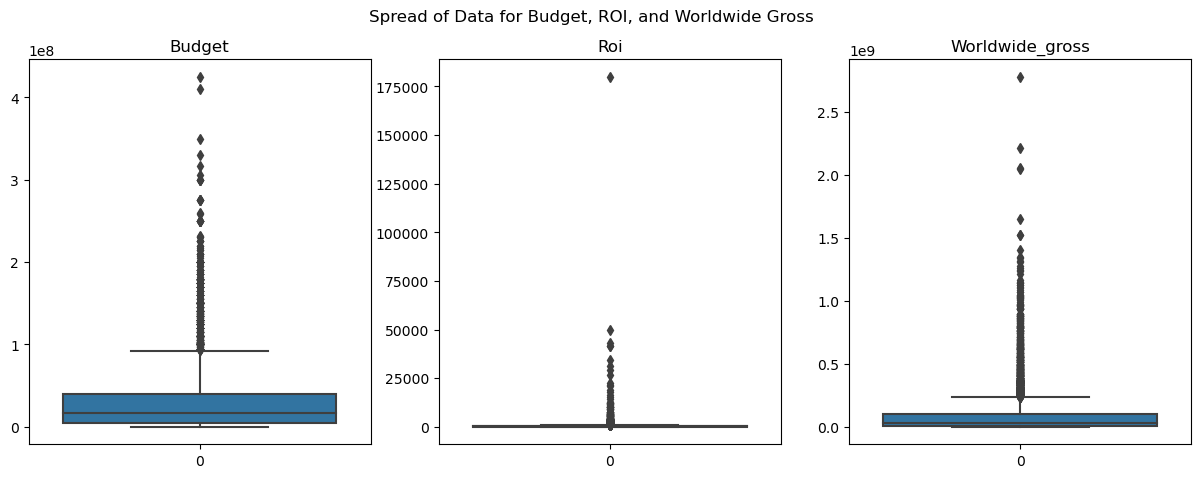

In [11]:

columns_to_plot = ['budget', 'ROI', 'worldwide_gross']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(budgets_df[column], ax=ax[i])
    ax[i].set_title(column.capitalize())  # Capitalize the column name for better readability

plt.suptitle('Spread of Data for Budget, ROI, and Worldwide Gross')
plt.show()


Removing Outliers in budget, ROI, and worldwide gross columns

In [12]:
def is_outlier(x, df):
    """
    This function takes a value and its associated
    group of values as its arguments. It determines whether
    or not the value is an outlier in its dataset; if it is,
    it returns a null value. If not, it returns the original value.
    """

    q1, q3 = df.quantile([.25, .75])
    iqr = q3 - q1
    
    lower_limit = q1 - (iqr * 1.5)
    upper_limit = q3 + (iqr * 1.5)
    
    if any([(x < lower_limit), (x > upper_limit)]):
        return np.nan
    else:
        return x

# Number of rows pre-cleaning
print("The previous dataframe had {} rows.\n".format(budgets_df.shape[0]))

to_clean = ['budget', 'ROI', 'worldwide_gross']

for column in to_clean:
    budgets_df[column] = budgets_df[column].map(lambda x: is_outlier(x, budgets_df[column]))

# This shows us how many 'outliers' are in each column. 
for column in to_clean:
    print(budgets_df[column].isnull().value_counts())

budgets_df.dropna(inplace=True)

# Resetting the index
budgets_df = budgets_df.reset_index(drop=True)

# Number of rows post-cleaning
print("\nThe current dataframe has {} rows.".format(budgets_df.shape[0]))


The previous dataframe had 5782 rows.

budget
False    5351
True      431
Name: count, dtype: int64
ROI
False    5287
True      495
Name: count, dtype: int64
worldwide_gross
False    5178
True      604
Name: count, dtype: int64

The current dataframe has 4695 rows.


**Creating the ROI-tier column**

This column will help in classifying the movie based on it ROI

In [13]:
# The number of bins we split ROI into
num_bins = 15

# Creating the endpoints for our ranges
ROI_range = np.linspace(0, 1000, num_bins, dtype=int)

# Creating neatly formatted strings for our ranges
ROIstrings = [f"{round(i, 1)} percent" for i in ROI_range]
ROIranges = [f"{ROIstrings[i]} – {ROIstrings[i+1]}" for i in range(len(ROIstrings)-1)]

# Creating the ROItier column for our dataframe
budgets_df['ROItier'] = pd.cut(budgets_df['ROI'], bins=ROI_range, labels=ROIranges)

# Displaying a sample of the resulting dataframe
print(budgets_df[['ROI', 'ROItier']].head())


      ROI                    ROItier
0  176.04  142 percent – 214 percent
1   25.99     0 percent – 71 percent
2   20.13     0 percent – 71 percent
3  206.44  142 percent – 214 percent
4  212.38  142 percent – 214 percent


**Creating the budget-tier column**

The column helps to categorize the movie based on the budget

In [14]:
budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']

# Creating the budget-tier column for our dataframe
budgets_df['budget_category'] = pd.cut(budgets_df['budget'], bins=budget_bins, labels=budget_labels, right=False)

# Displaying a sample of the resulting dataframe
print(budgets_df[['budget', 'budget_category']].head())


       budget budget_category
0  92500000.0          Medium
1  92000000.0          Medium
2  92000000.0          Medium
3  91000000.0          Medium
4  90000000.0          Medium


Re-ordering columns

It is now time to make the columns appear in the right order

In [15]:
budgets_df = budgets_df[['id', 'date', 'movie', 'budget', 'budget_category',
                         'domestic_gross', 'foreign_gross',
                         'worldwide_gross', 'ROI', 'ROItier',
                         'profitable']]

# Displaying the first row of the resulting dataframe
budgets_df.head(5)


,id,date,movie,budget,budget_category,domestic_gross,foreign_gross,worldwide_gross,ROI,ROItier,profitable
0,32,2008,The Spiderwick Chronicles,92500000.0,Medium,71195053,91644614,162839667.0,176.04,142 percent – 214 percent,True
1,35,2004,The Alamo,92000000.0,Medium,22406362,1505000,23911362.0,25.99,0 percent – 71 percent,False
2,36,1995,Cutthroat Island,92000000.0,Medium,10017322,8500000,18517322.0,20.13,0 percent – 71 percent,False
3,37,2013,The Secret Life of Walter Mitty,91000000.0,Medium,58236838,129624345,187861183.0,206.44,142 percent – 214 percent,True
4,50,2008,Tropic Thunder,90000000.0,Medium,110515313,80629943,191145256.0,212.38,142 percent – 214 percent,True


**Budgets Question and Analysis**

The objective in this section is to determine the priority areas within advertising, specifically focusing on domestic and foreign advertising. Three visualizations will be generated to address this inquiry:

* Comparison of Domestic and Foreign Percentage of Total Gross for Movies of Varying Levels of Success: The analysis will delve into the relative contributions of domestic and foreign markets to the total gross of movies across different success levels.
* Comparison of Domestic and Foreign Percentage of Total Gross for Movies with Different Budgets: This visualization aims to contrast the impact of domestic and foreign markets on the total gross of movies across various budget categories.
* Comparison of Domestic and Foreign Percentage of Total Gross for Both Profitable and Unprofitable Movies: The final set of visualizations will specifically assess the influence of domestic and foreign advertising on the total gross of movies, distinguishing between profitable and unprofitable films.

These visualizations will provide valuable insights into the prioritization of advertising efforts in both domestic and foreign markets based on different success criteria and budget considerations.

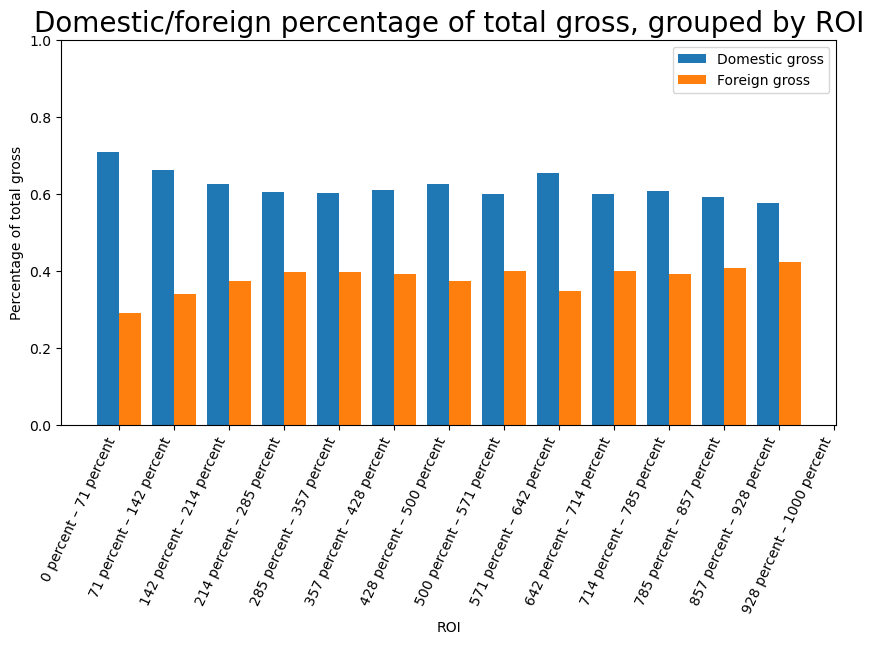

In [16]:
# Grouping the data by 'ROItier' and calculating mean percentages
grouped_df = budgets_df.groupby('ROItier').agg({
    'domestic_gross': lambda x: (x / budgets_df['worldwide_gross']).mean(),
    'foreign_gross': lambda x: (x / budgets_df['worldwide_gross']).mean()
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

x = grouped_df['ROItier']
domestic_percentage_means = grouped_df['domestic_gross']
foreign_percentage_means = grouped_df['foreign_gross']

x_axis = np.arange(len(x))
barplot1 = ax.bar(x_axis - 0.2, domestic_percentage_means, 0.4, label='Domestic gross')
barplot2 = ax.bar(x_axis + 0.2, foreign_percentage_means, 0.4, label='Foreign gross')

ax.set_xticks(x_axis)
ax.set_xticklabels(x, rotation=65, ha='right')
ax.set_xlabel("ROI")
ax.set_ylabel("Percentage of total gross")

ax.set_ylim(0, 1)

ax.legend(loc='upper right')
ax.set_title("Domestic/foreign percentage of total gross, grouped by ROI", fontsize=20)

plt.show()


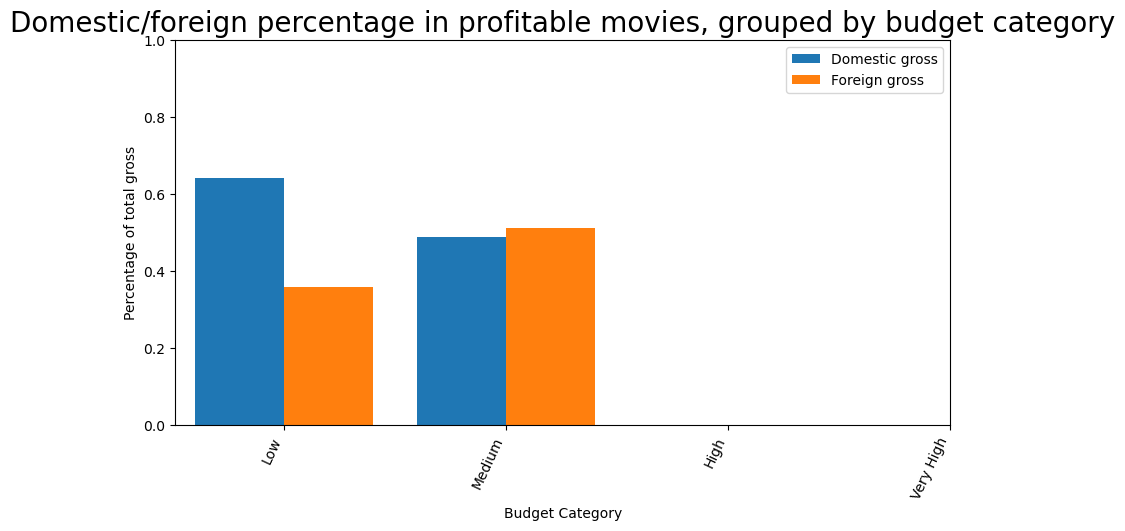

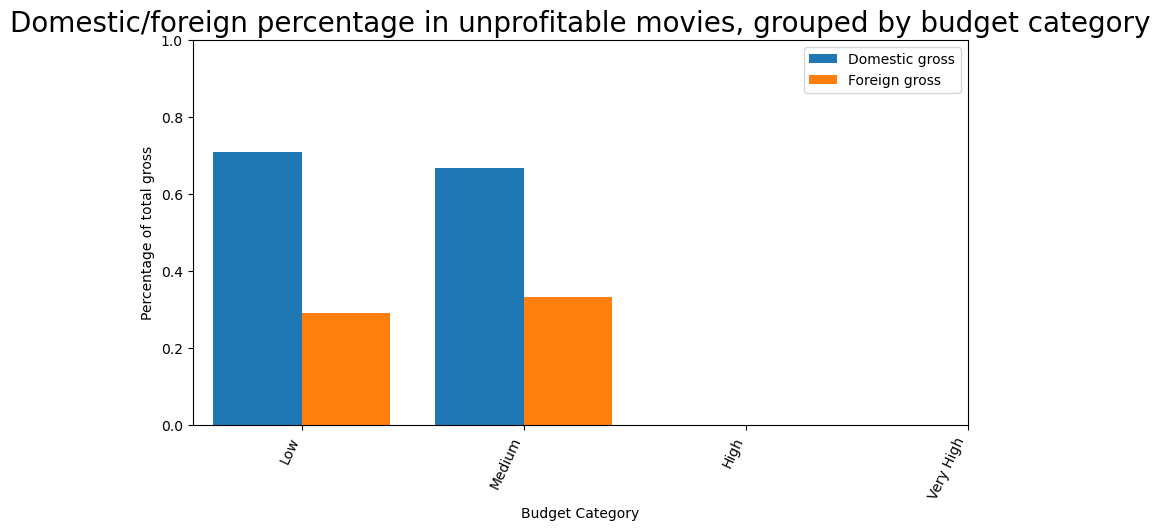

In [17]:
# Two datasets for use in the visualizations
unprofitable = budgets_df[budgets_df.profitable == False]  # All unprofitable movies
profitable = budgets_df[budgets_df.profitable == True]  # All profitable movies

datasets = [(profitable, 'profitable'), (unprofitable, 'unprofitable')]
tierranges = ['Low', 'Medium', 'High', 'Very High']

for dataset, label in datasets:
    fig, ax = plt.subplots(figsize=(10, 5))

    x = tierranges  # The clearly formatted string for all ROI tiers
    domestic_percentage_means = []  # Domestic gross percentage of total gross per ROI tier
    foreign_percentage_means = []  # Foreign gross percentage of total gross per ROI tier

    for i in x:
        df = dataset[dataset.budget_category == i]

        try:
            domestic_percentage = df['domestic_gross'] / df['worldwide_gross']
            foreign_percentage = df['foreign_gross'] / df['worldwide_gross']

            domestic_percentage_means.append(domestic_percentage.mean())
            foreign_percentage_means.append(foreign_percentage.mean())
        except (ZeroDivisionError, TypeError):
            # Handle division by zero error and TypeError
            continue

    x_axis = np.arange(len(x))
    barplot1 = ax.bar(x_axis - 0.2, domestic_percentage_means, 0.4, label='Domestic gross')
    barplot2 = ax.bar(x_axis + 0.2, foreign_percentage_means, 0.4, label='Foreign gross')

    ax.set_xticks(x_axis)
    ax.set_xticklabels(x, rotation=65, horizontalalignment='right')
    ax.set_xlabel("Budget Category")
    ax.set_ylabel("Percentage of total gross")

    ax.set_ylim(0, 1)

    ax.legend(loc='upper right')
    ax.set_title(f"Domestic/foreign percentage in {label} movies, grouped by budget category", fontsize=20)

plt.show()


**Budgets Recommendation**

Given the consistent pattern that appears across films of different levels of success, prioritizing advertising efforts should be focused on domestic channels. While it is important to highlight the role of domestic advertising, we must not ignore foreign advertising. Foreign advertising is often more prominent in more financially successful and lavishly budgeted films. It is critical to maintain a balanced strategy, generously funding both local and international advertising campaigns. This strategic suggestion is especially helpful for Microsoft since it encourages a careful distribution of resources, which is a good practice for any company that wants to get the most out of the ever-changing film marketing industry.

# Genre – Data Collecting & Cleaning


The `im.db` dataset provides the most comprehensive and valuable genre information. Budget and gross information, two crucial financial criteria, are missing, nevertheless. One strategic method combines data from many tables using well-structured joins to assess the genre's influence on ROI and profitability. Thanks to this connection, we can conduct more comprehensive research, delving into the correlation between genre dynamics and financial success KPIs in great detail. The complex link between genres and movie profitability or return on investment (ROI) may be better understood by integrating datasets that provide insights that connect genre-specific traits with financial performance metrics.

In [18]:
merged_df = pd.merge(budgets_df, movie_basics, left_on='movie', right_on='primary_title', how='inner')

# Select the desired columns
genredf = merged_df[['movie_id', 'date', 'genres', 'movie', 'budget', 'ROI', 'profitable']]

# Display the first row of the resulting dataframe
genredf.head()

,movie_id,date,genres,movie,budget,ROI,profitable
0,tt0359950,2013,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,91000000.0,206.44,True
1,tt1564021,1997,"Documentary,History",Contact,90000000.0,184.33,True
2,tt7332012,1997,Documentary,Contact,90000000.0,184.33,True
3,tt2404435,2016,"Action,Adventure,Western",The Magnificent Seven,90000000.0,180.58,True
4,tt7368554,2005,"Comedy,Drama",The Interpreter,90000000.0,180.84,True


Removing Duplicates

In [19]:
genredf.movie_id.value_counts().value_counts() #Checking for duplicates in the dataset

count
1    2902
2      84
Name: count, dtype: int64

In [20]:
genredf.movie_id.value_counts().head()

movie_id
tt1321509    2
tt4463894    2
tt5112932    2
tt3276924    2
tt2039338    2
Name: count, dtype: int64

In [21]:
# Remove duplicate entries in genredf based on 'movie_id'
genredf = genredf.drop_duplicates(subset='movie_id')

# Display the counts of unique counts of 'movie_id' to identify remaining duplicates
unique_counts = genredf.movie_id.value_counts().value_counts()
print(f"There are many duplicate entries: {unique_counts}")

There are many duplicate entries: count
1    2986
Name: count, dtype: int64


In [22]:
# Display the first two rows of 'movie_id' with duplicates to inspect conflicting data
genredf.movie_id.value_counts().head()

movie_id
tt0359950    1
tt2379653    1
tt1974419    1
tt2147225    1
tt1772422    1
Name: count, dtype: int64

In [23]:
# Display information for a specific 'movie_id' with conflicting data
genredf[genredf.movie_id == 'tt3555036']

,movie_id,date,genres,movie,budget,ROI,profitable
1035,tt3555036,1986,"Action,Drama",Legend,25000000.0,94.02,False


In [24]:
# Display information for another 'movie_id' with conflicting data
genredf[genredf.movie_id == 'tt2467046']

,movie_id,date,genres,movie,budget,ROI,profitable
1314,tt2467046,2001,"Action,Drama,Fantasy",Left Behind,18500000.0,22.82,False


The 'duplicate' entries are likely to contain conflicting data. It's clear we have to remove them

In [25]:
# Find the movie_ids that have at least two occurrences
duplicate_movie_ids = genredf[genredf.duplicated('movie_id', keep=False)]['movie_id'].unique()

# Filter genredf to include only rows where movie_id is not in duplicate_movie_ids
genredf = genredf[~genredf['movie_id'].isin(duplicate_movie_ids)].copy()

# Display the resulting dataframe
genredf


,movie_id,date,genres,movie,budget,ROI,profitable
0,tt0359950,2013,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,91000000.0,206.44,True
1,tt1564021,1997,"Documentary,History",Contact,90000000.0,184.33,True
2,tt7332012,1997,Documentary,Contact,90000000.0,184.33,True
3,tt2404435,2016,"Action,Adventure,Western",The Magnificent Seven,90000000.0,180.58,True
4,tt7368554,2005,"Comedy,Drama",The Interpreter,90000000.0,180.84,True
...,...,...,...,...,...,...,...
3065,tt3973612,2014,Drama,Stories of Our Lives,15000.0,0.00,False
3066,tt6616538,1996,None,Bang,10000.0,5.27,False
3067,tt1880418,2012,"Comedy,Drama",Newlyweds,9000.0,50.93,False
3068,tt7837402,2018,"Horror,Sci-Fi,Thriller",Red 11,7000.0,0.00,False


In [26]:
genredf.movie_id.value_counts().value_counts() # The duplicate entries are now gone

count
1    2986
Name: count, dtype: int64

**Genre Distribution and Genre Profitability**

This section initiates the analytical process by investigating the correlations between film success and various genres. To achieve this, a meticulous extraction of a comprehensive genre list from the dataset is undertaken. Subsequently, boolean columns are crafted for each genre, assigning values of `1 or 0 `to denote their presence or absence in a given movie. These boolean columns serve as the foundation for constructing a correlation matrix, a crucial step in comprehending the nuanced relationships between different genres and success metrics. The matrix is then harnessed to generate an insightful heatmap using the seaborn package, offering a visual depiction of the robustness of correlations among genres. Notably, the focus on correlating with the boolean variable `profitable` is strategically chosen, given its binary nature that harmonizes well with categorical genres, steering clear of the intricate challenges associated with correlating continuous variables like `Return on Investment (ROI)` with genre categories.

In [27]:
# Extracting list of unique genres

genres = genredf['genres'].unique()
genres = [genre for genre in genres if genre is not None]
unique_genres = sorted(list(set(','.join(genres).split(','))))

unique_genres


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [28]:
# Creating a boolean DataFrame for genres
boolean_df = genredf['genres'].str.get_dummies(',')

# Extracting genre names from the columns
genres = boolean_df.columns

# Creating a boolean DataFrame with column names starting with "is_"
genrebooldf = pd.DataFrame()

# Populating boolean DataFrame
for i in genres:
    is_genre_column = "is_" + i
    genrebooldf[is_genre_column] = boolean_df[i].astype(bool)

# Adding profitable column to boolean dataframe
genrebooldf['profitable'] = genredf['profitable']

# Adding ROI column to boolean dataframe
genrebooldf['ROI'] = genredf['ROI']
# Displaying the resulting DataFrame
genrebooldf


,is_Action,is_Adventure,is_Animation,is_Biography,is_Comedy,is_Crime,is_Documentary,is_Drama,is_Family,is_Fantasy,...,is_News,is_Reality-TV,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,profitable,ROI
0,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,206.44
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,184.33
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,184.33
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,180.58
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,180.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0.00
3066,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5.27
3067,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,50.93
3068,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,0.00


**Average ROI and rate of profitabilty by genre**

Taking a different approach, the analysis will involve measuring the average hit rate (profitability rate) and ROI for movies within specific genres, facilitating a comprehensive side-by-side comparison across all genres. The next visualizations in this section aim to provide insights into the average success rates and returns on investment associated with different genres. To bolster the reliability of these findings, error bars will be calculated using the standard error, derived from the standard deviation of the sample divided by the sample size. This statistical approach adds a layer of precision to the analysis, offering a more nuanced understanding of the variability within each genre's performance metrics.

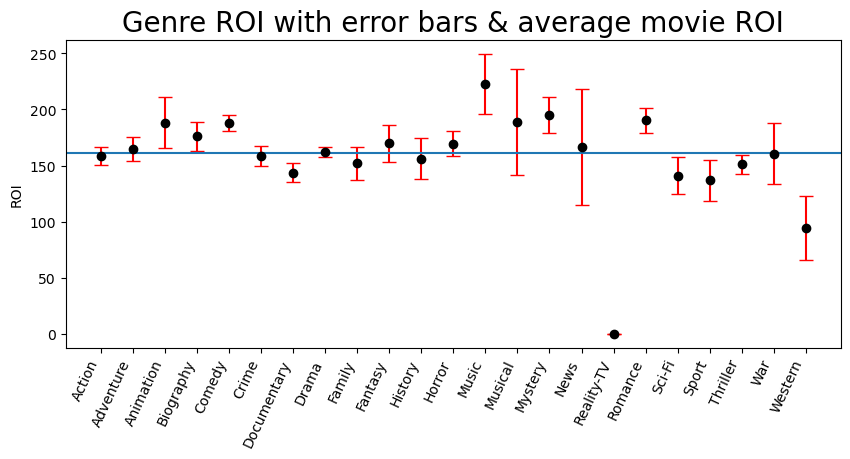

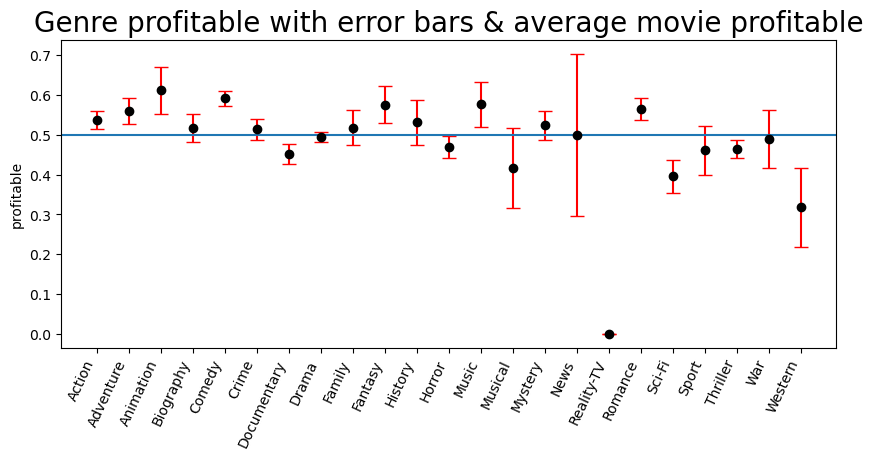

In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt

attributes = ['ROI', 'profitable']

for attribute in attributes:
    # Create a list to store average attribute with the genre and necessary std/sample sizes
    genre_attributes = []

    # Calculate the average attribute across the entire dataset
    average = genrebooldf[attribute].mean()

    for genre in genres:
        colname = "is_" + genre

        # Calculate attribute with the specific genre
        on = genrebooldf[genrebooldf[colname] == 1][attribute].mean()
        std = np.std(genrebooldf[genrebooldf[colname] == 1][attribute])
        sample_size = len(genrebooldf[genrebooldf[colname] == 1])

        # Calculate standard error
        root = math.sqrt(sample_size)

        # Append to the main list
        genre_attributes.append([on, std, root])

    # Create a new plot for each attribute
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_title(f"Genre {attribute} with error bars & average movie {attribute}", fontsize=20)

    x = genres
    y = [i[0] for i in genre_attributes]

    # Calculate error bars
    errorbars = [i[1] / i[2] for i in genre_attributes]

    # Plot with error bars
    plt.errorbar(x, y, yerr=errorbars, fmt='o', color='black', ecolor='red', capsize=5)
    plt.xticks(rotation=65, horizontalalignment='right')
    plt.ylabel(attribute)
    
    # Add a horizontal line at the overall average
    ax.axhline(average, xmin=0, xmax=250)

plt.show()


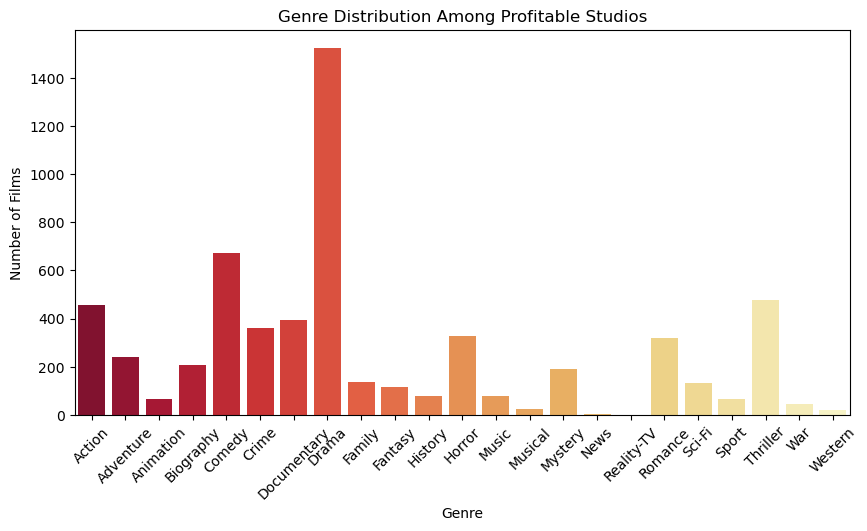

In [30]:
# Calculate the distribution of each genre
genre_distribution = genrebooldf[[f'is_{genre}' for genre in genres]].sum()

# Create a bar plot for Genre Distribution
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=genres, y=genre_distribution, palette="YlOrRd_r")
ax.set(xlabel="Genre", ylabel="Number of Films", title="Genre Distribution Among Profitable Studios")
plt.xticks(rotation=45)
plt.show()


For optimal content decision-making, Microsoft is advised to prioritize Comedy, Fantasy, and Romance genres, considering them as safe bets. Genres labeled as Average, including Action, Adventure, Biography, Crime, Drama, Family, History, Horror, Music, Musical, Mystery, and War, fall in the middle ground without explicit recommendations for avoidance or preference. On the contrary, Microsoft should exercise caution and potentially avoid genres such as Documentary, Reality TV, Sci-Fi, Sport, Thriller, Western, and News. This strategic guidance is designed to help Microsoft make informed and financially prudent decisions, aligning with best practices for content creation and investment. By emphasizing proven-success genres and exercising caution in potentially riskier areas, Microsoft can enhance the prospects of creating both successful and profitable content.

## Cast – Data Preparation & Cleaning

The given dataset, similar to the "`principals`" dataset, contains comprehensive information about the entire cast for each movie, including details about their roles and characters. It features essential columns such as 'person_id' derived from the "principals" dataset, 'primary_name' obtained from the "persons" dataset, 'profession' extracted from the `principals` `dataset`, `movie_id`, `year`, `ROI`, and `profitable`, all of which are derived from the preceding dataset discussed in the last section. The inclusion of these columns facilitates a comprehensive analysis of the cast and their contributions to movie profitability, with unnecessary columns like '`runtime`,' '`budget`,' '`budget_category`,' and all gross-related columns being excluded to streamline the dataset for more focused and relevant insights.

In [31]:
principals.head(5) #Displaying data in principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [32]:
# Merge the DataFrames
merged_df = pd.merge(genredf, principals, on='movie_id')
merged_df = pd.merge(merged_df, persons, on='person_id')

# Selecting specific columns
castdf = merged_df[['person_id', 'primary_name', 'category', 'movie_id', 'date', 'ROI', 'profitable']]
castdf.columns = ['person_id', 'name', 'profession', 'movie_id', 'year', 'ROI', 'hitrate']


In [33]:
castdf.head()

,person_id,name,profession,movie_id,year,ROI,hitrate
0,nm0788640,Theodore Shapiro,composer,tt0359950,2013,206.44,True
1,nm0788640,Theodore Shapiro,composer,tt1430626,2012,247.53,True
2,nm0788640,Theodore Shapiro,composer,tt2361509,2015,492.79,True
3,nm0788640,Theodore Shapiro,composer,tt2091256,2017,333.10,True
4,nm0788640,Theodore Shapiro,composer,tt1535438,2012,443.62,True


In [34]:
professions = list(castdf['profession'].unique()) #Creating unique professions
professions

['composer',
 'actor',
 'producer',
 'actress',
 'writer',
 'director',
 'editor',
 'self',
 'cinematographer',
 'production_designer',
 'archive_footage']

In [35]:
# Updating professions list
professions = ['actor', 'actress', 'director', 'producer', 'writer']

**Impact of profession's ROI on movie's ROI**



In [36]:
profession_roi = merged_df.groupby('category')['ROI'].mean().reset_index()

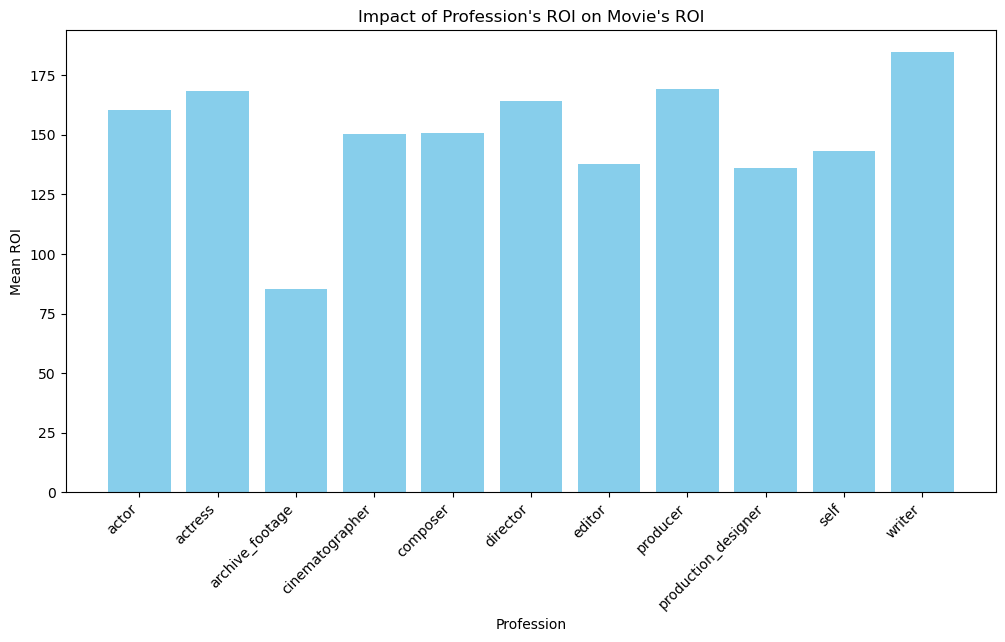

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(profession_roi['category'], profession_roi['ROI'], color='skyblue')
plt.xlabel('Profession')
plt.ylabel('Mean ROI')
plt.title("Impact of Profession's ROI on Movie's ROI")
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:
def query(profession, profession_attribute, movie_attribute, before, after):
    """
    Analyzes movie data based on a chosen profession and its attributes.

    Args:
        profession (str): The chosen profession (e.g., 'actor').
        profession_attribute (str): Attribute of the chosen profession (e.g., 'ROI').
        movie_attribute (str): Attribute of the movies (e.g., 'hitrate').
        before (pd.DataFrame): Dataset containing information before the movie.
        after (pd.DataFrame): Dataset containing information after the movie.

    Returns:
        Tuple: Results of the analysis including bins, means, correlation, and rsquared.
    """

    # Creating local references to datasets for use within the function
    beforelocal = before
    afterlocal = after
    
    # Creating bins based on whether selected attribute is ROI or profitable
    # ROI will have much higher values, profitable will only have values between 0 and 1
    if profession_attribute == "ROI":
        linspace = np.linspace(0, 1000, 20, dtype=int)
    elif profession_attribute == "hitrate":
        linspace = np.linspace(0, 1.01, 20)
    else:
        return "Invalid profession attribute"
    
    bins = []  # Bins denoted in string form
    means = []  # Average movie attribute per bin
    
    for i in range(len(linspace)-1):
        # Gets all people from the first dataset with ROI within a range
        mask = (beforelocal['profession'] == profession) & \
               (beforelocal[profession_attribute].between(linspace[i], linspace[i+1]))
        df1 = beforelocal[mask].groupby('person_id').size().reset_index(name='count')

        # Only gathering bins of a certain size to prevent misleading data
        if len(df1) < 5:
            continue

        # Retrieving data from the same people in the second dataset
        df2 = afterlocal[afterlocal['person_id'].isin(df1['person_id'])]

        # Appending the average ROI to our list
        means.append(df2[movie_attribute].mean())

        # Creating the strings for each bin
        start, end = round(linspace[i], 2), round(linspace[i+1], 2)
        bins.append('{} – {}, [{} values]'.format(start, end, len(df1)))

    # Correlation
    # Calculated on the list of means from the movies in the second dataset.
    # If there are fewer than five means, the correlation won't be meaningful.
    # NaN returned unless we have five or more data points.
    if len(means) >= 5:
        correlation = np.corrcoef(range(0, len(means)), means)[0, 1]
    else:
        correlation = np.nan

    # R Squared values (predictive power)
    rsquared = correlation**2

    return (profession,
            profession_attribute,
            movie_attribute,
            bins,
            means,
            correlation,
            rsquared)


**Selecting the appropriate years for Analysis**

Choosing the years 2011-2015 is suitable as each of these years contains over 1000 unique individuals. Additionally, after partitioning the dataset, the average statistical difference between individuals across datasets remains below 10%, contributing positively to the accuracy of our results.

In [39]:
years = sorted(castdf.year.unique())

acceptable_years = range(2011,2016)

**Establishing the shell for our dataframe.**

The dataframe needs to be structured with columns corresponding to each year and three indices representing the variables being correlated: the profession type, the selected profession stat (either ROI or profitable), and the chosen movie stat (either ROI or profitable). This organizational setup is crucial for efficiently capturing and analyzing the relationships between different variables across multiple years in our dataset.

In [40]:
attributes = ['ROI', 'hitrate']

profession = []
profession_attribute = []
movie_attribute = []

for p in professions:
    for a in attributes:
        for b in attributes:
            profession.append(p)
            profession_attribute.append(a)
            movie_attribute.append(b)

# Creating the dataframe shell
data = {'profession': profession, 'profession_attribute': profession_attribute, 'movie_attribute': movie_attribute}

df_shell= pd.DataFrame(data) 

# Displaying the dataframe
df_shell

,profession,profession_attribute,movie_attribute
0,actor,ROI,ROI
1,actor,ROI,hitrate
2,actor,hitrate,ROI
3,actor,hitrate,hitrate
4,actress,ROI,ROI
5,actress,ROI,hitrate
6,actress,hitrate,ROI
7,actress,hitrate,hitrate
8,director,ROI,ROI
9,director,ROI,hitrate


This appears satisfactory.

In [41]:
# Function to calculate correlation based on the given query
def calculate_correlation(castdf, year, professions, attributes):
    # Splitting our dataset down the year
    before = castdf[castdf.year <= year].copy()
    after = castdf[castdf.year > year].copy()

    # Getting the list of people in common
    intersection = set(before.person_id.unique()).intersection(set(after.person_id.unique()))

    # Reducing each dataset to only include people from the intersection
    before = before[before.person_id.isin(intersection)]
    after = after[after.person_id.isin(intersection)]

    # A column of correlations in a specific year – reset and appended to the dataframe every loop
    column = []

    # Creating the year column
    for p in professions:
        for a in attributes:
            for b in attributes:
                correlation = query(p, a, b, before, after)[5]  # Retrieves correlation from query
                column.append(correlation)  # Appends correlation to our column

    return column


# This loop gathers correlation data and appends it to new columns in the dataframe.
for year in acceptable_years:
    # Calculate correlations for the current year
    correlation_column = calculate_correlation(castdf, year, professions, attributes)

    # Appends year column to the dataframe
    data[year] = correlation_column

    # A ticker to show you the progress of the loop (it takes a minute to complete)
    print("{} done.".format(year), end=" ")


2011 done. 2012 done. 2013 done. 2014 done. 2015 done. 

In [42]:
castdf1 = pd.DataFrame(data)
castdf1

,profession,profession_attribute,movie_attribute,2011,2012,2013,2014,2015
0,actor,ROI,ROI,0.359340,0.426204,0.537336,0.701836,0.188302
1,actor,ROI,hitrate,0.426228,0.187935,0.161390,0.409955,0.410991
2,actor,hitrate,ROI,NaN,NaN,NaN,NaN,NaN
3,actor,hitrate,hitrate,NaN,NaN,NaN,NaN,NaN
4,actress,ROI,ROI,0.216661,0.247248,0.228250,0.611447,0.463387
5,actress,ROI,hitrate,0.329427,0.428565,0.276212,0.540566,0.560601
6,actress,hitrate,ROI,NaN,NaN,NaN,NaN,NaN
7,actress,hitrate,hitrate,NaN,NaN,NaN,NaN,NaN
8,director,ROI,ROI,0.477339,0.082952,-0.185437,0.007282,0.000147
9,director,ROI,hitrate,0.249608,0.295427,0.003415,0.233384,0.046157


In [43]:
correlationsdf = df_shell.merge(castdf1, how='right')

correlationsdf

,profession,profession_attribute,movie_attribute,2011,2012,2013,2014,2015
0,actor,ROI,ROI,0.359340,0.426204,0.537336,0.701836,0.188302
1,actor,ROI,hitrate,0.426228,0.187935,0.161390,0.409955,0.410991
2,actor,hitrate,ROI,NaN,NaN,NaN,NaN,NaN
3,actor,hitrate,hitrate,NaN,NaN,NaN,NaN,NaN
4,actress,ROI,ROI,0.216661,0.247248,0.228250,0.611447,0.463387
5,actress,ROI,hitrate,0.329427,0.428565,0.276212,0.540566,0.560601
6,actress,hitrate,ROI,NaN,NaN,NaN,NaN,NaN
7,actress,hitrate,hitrate,NaN,NaN,NaN,NaN,NaN
8,director,ROI,ROI,0.477339,0.082952,-0.185437,0.007282,0.000147
9,director,ROI,hitrate,0.249608,0.295427,0.003415,0.233384,0.046157


There are numerous `NaN values` in the dataset, yet this situation is preferable to including correlations that lack significance or are potentially deceptive, as such misleading information might lead to unjustified conclusions.

`Consolidating data`

Consolidating all correlations across professions to analyze the collective results.

In [44]:
correlationsdf.groupby('profession').mean(numeric_only=True)

,2011,2012,2013,2014,2015
profession,,,,,
actor,0.392784,0.307070,0.349363,0.555896,0.299646
actress,0.273044,0.337906,0.252231,0.576006,0.511994
director,0.363474,0.189189,-0.091011,0.120333,0.023152
producer,0.471749,0.174809,0.107091,0.343389,0.254262
writer,0.705675,0.595683,0.479882,0.310144,0.356263


`Averaging across year`

Observing a solitary negative correlation (ideally, there should be none) is a positive outcome. Success in each profession should ideally correlate positively with movie success. The focus now is to identify which professions exhibit a stronger correlation with movie success. To achieve this, another round of aggregation is necessary, this time across years, to obtain a comprehensive measure of a profession's success in relation to movie success.

In [45]:
profession_correlations = correlationsdf.groupby('profession').mean(numeric_only=True).mean(numeric_only=True, axis=1)

# Displaying the resulting profession correlations
print(profession_correlations)


profession
actor       0.380952
actress     0.390236
director    0.121028
producer    0.270260
writer      0.489530
dtype: float64


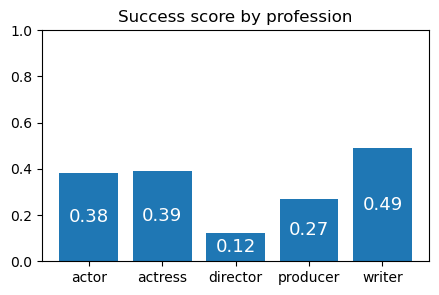

In [46]:

fig, ax = plt.subplots(figsize=(5, 3))

x_values = profession_correlations.index
y_values = profession_correlations.values

barplot = ax.bar(x_values, y_values)
ax.set_ylim(0, 1)

ax.bar_label(barplot, labels=[round(value, 2) for value in y_values], label_type='center', color='white', fontsize='13')
ax.set_title('Success score by profession')

plt.show()


The investigated data in this section categorizes professions into two primary groups: on-screen and off-screen. While there is some variability within these categories, it is evident that off-screen roles significantly influence a movie's success compared to on-screen roles. This observation aligns with the rationale that off-screen professionals make decisions regarding on-screen personnel. Further aggregation of this data involves calculating the average score separately for on-screen and off-screen categories.

`Averaging across profession`

In [47]:
# Compute average correlations for on-screen and off-screen crew
on_screen_average = (profession_correlations['actor'] + profession_correlations['actress']) / 2
off_screen_average = (profession_correlations['director'] +
                      profession_correlations['producer'] +
                      profession_correlations['writer']) / 3

# Display the average correlations
print(f"The average correlation between on-screen crew success and movie success is {on_screen_average}.")
print(f"The average correlation between off-screen crew success and movie success is {off_screen_average}.")


The average correlation between on-screen crew success and movie success is 0.3855941031894856.
The average correlation between off-screen crew success and movie success is 0.29360572912336286.


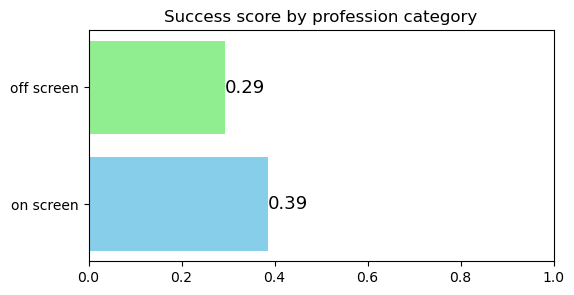

In [48]:
# Visualize the results with a horizontal bar plot
fig, ax = plt.subplots(figsize=(6, 3))

categories = ['on screen', 'off screen']
average_scores = [on_screen_average, off_screen_average]

barplot = ax.barh(categories, average_scores, color=['skyblue', 'lightgreen'])
ax.set_xlim(0, 1)

ax.bar_label(barplot, labels=[round(score, 2) for score in average_scores], label_type='edge', color='black', fontsize='13')
ax.set_title('Success score by profession category')

plt.show()


**Cast – Recommendation**

The overall recommendation for Microsoft in the hiring process for cast and crew emphasizes the prioritization of off-screen personnel over on-screen individuals. More specifically, the recommendation entails allocating time and resources to the selection and hiring of off-screen crew members, with a particular emphasis on prioritizing directors over producers and writers. This strategic approach aims to assist Microsoft by focusing on the recruitment of the most crucial cast members, ultimately enhancing the likelihood of producing successful movies.